# Linear Regression

In [36]:
import numpy as np
import pandas as pd

To get started, let’s simulate some data and look at how the predicted values (Yₑ) differ from the actual value (Y):

In [37]:
# Generate 'random' data
np.random.seed(0)
mean = 1.5
stddev = 2.5
X = stddev * np.random.randn(50) + mean   
res = 0.5 * np.random.randn(50)      
y = 2 + 0.3 * X + res                 

In [38]:
# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()

,X,y
0,5.910131,3.325306
1,2.500393,2.943569
2,3.946845,2.928651
3,7.102233,3.540354
4,6.168895,3.836577


In [39]:
df.columns

Index(['X', 'y'], dtype='object')

To estimate y using the OLS method, we need to calculate xmean and ymean, the covariance of X and y (xycov), and the variance of X (xvar) before we can determine the values for α and β.

In [40]:
# Calculate the mean of X and y
xmean = np.mean(df['X'])
ymean = np.mean(df['y'])

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {np.round(alpha,2)}')
print(f'beta = {np.round(beta,2)}')

alpha = 2.01
beta = 0.29


In [41]:
ypred = alpha + beta*X

len(ypred)

50

In [42]:
ypred

array([3.72555931, 2.73372862, 3.15447517, 4.07232013, 3.80082908,
       1.73205162, 3.13364108, 2.33266485, 2.36767128, 2.74132158,
       2.54748163, 3.50028675, 2.99616256, 2.53121512, 2.76551184,
       2.68538197, 3.52923353, 2.29354048, 2.67039674, 1.82163023,
       0.5861868 , 2.91804689, 3.0713544 , 1.90302675, 4.09330829,
       1.38511122, 2.4760083 , 2.30661156, 3.55737645, 3.51125682,
       2.55541096, 2.71773399, 1.7971307 , 1.00228838, 2.18972921,
       2.55643017, 3.33740542, 3.31710854, 2.16106669, 2.22289657,
       1.68022006, 1.41008905, 1.20192513, 3.86134516, 2.07211113,
       2.12416289, 1.53169407, 3.00812699, 1.26909871, 2.28802681])

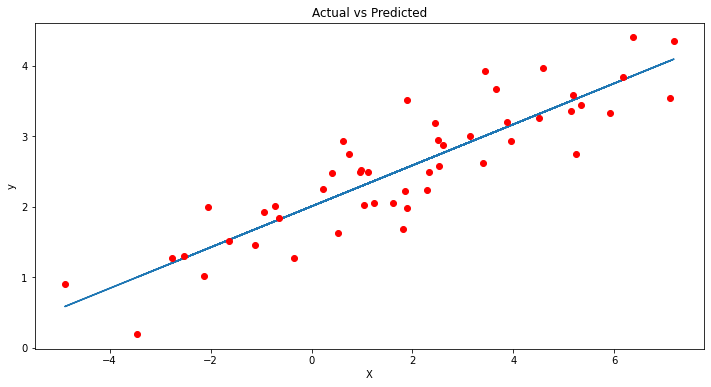

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

# Linear Regression with scikit-learn

In [11]:
import pandas as pd
advert = pd.read_csv("Advertising.csv")
advert.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [12]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['TV','Radio']
X = advert[predictors]
y = advert['Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [13]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.9210999124051362
betas = [0.04575482 0.18799423]


In [14]:
model.predict(X)

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

In [15]:
new_X = [[300, 200]]
print(model.predict(new_X))

[54.24638977]


# Analyze Data

The dataset contains 3 columns namely “Gender”, “Height” and “Weight”.

In [16]:
dataset = pd.read_csv("weight-height.csv")

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [18]:
dataset.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [19]:
dataset.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

# LabelEncoder

In [20]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values
from sklearn.preprocessing import LabelEncoder
labelEncoder_gender =  LabelEncoder()
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

# Optional - if you want to convert X to float data type
import numpy as np
X = np.vstack(X[:, :]).astype(np.float)

In [21]:
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


Replace directly in DataFrame

In [22]:
dataset['Gender'].replace('Female',0, inplace=True)
dataset['Gender'].replace('Male',1, inplace=True)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values

In [23]:
dataset.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [24]:
y

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [25]:
dataset.shape

(10000, 3)

Split dataset into training set and test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
len(X_train)

8000

In [28]:
len(X_test)

2000

# Fit Regression Model

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
lin_pred = lin_reg.predict(X_test)

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
print(r2_score(y_test,lin_pred))
print(mean_absolute_error(y_test,lin_pred))
print(mean_squared_error(y_test,lin_pred))

0.9052889824534557
7.955916525326746
97.87152220196164


In [32]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lin_pred.flatten()})
df

,Actual,Predicted
0,138.085796,141.938288
1,187.363366,176.556588
2,216.533191,219.778362
3,131.761443,148.831884
4,157.718438,162.092076
...,...,...
1995,189.856786,187.365166
1996,202.906859,203.915748
1997,152.420031,149.971296
1998,170.100647,166.833749


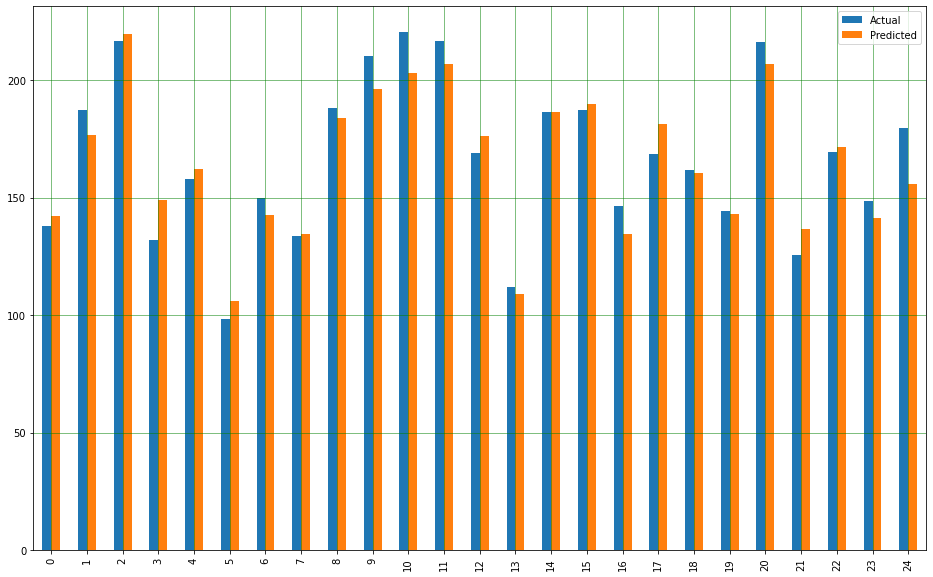

In [33]:
from matplotlib import pyplot as plt
%matplotlib inline
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [34]:
X_New = [[ 1., 73.84]]
lin_reg.predict(X_New)

array([215.71799113])